In [120]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
pd.options.display.float_format = '{:,.2f}'.format
import re



%matplotlib inline

### Truecaller candidate test

    Canditates : Data Roles
                 0-2y
                 Data Interns, Data Analyst, Associate Data Scientist
    
    Difficulty : (Level 1-3) of Level 5
    
 ``Please try to use functions and classes where-ever possible, be descriptive & efficient with your code, best of luck!``

## Questions S1

### Telecom industry - Q1
Dataset -> `TelecomData_WeeklyData.csv`

CUSTID: Is the unique customer information stored in the system
In our case, it is only 1 customer information

Week: Capture the spending and usage information for each week of the customer duration with the company
We have 6 month or 24 weeks weekly information for the customer

Calls: The number of calls made by the customer each week. It is the frequency of the calls
Minutes: The total minutes spent each week on the calls
    
Amt: The total weekly spending by the customer for the use of telecom service

Q1 - A telecom operator company wishes have some of their most active/spend worthy users rewarded to reduce churn, statistically find these users and graphically plot them based on variables in-order to select the best chunk of users?


Q2 - Who are our customers? Profile them elaborately 


Q3 - The startup has 4 offers running on a daily basis (valid for a day)
		Recharge - 20 for 10 Mins
		Recharge - 30 for 40 Mins
		Recharge - 40 for 80 Mins
		Recharge - 50 for 100 Mins

Their second recharge pack doesn't seem to perform as required, the others fetching ~100 recharges per day in a week on what day would it be advisable for the company to sell these recharges and boost calls made by users

Q4 - An investor wishes to see week,month and yearly metrics, derive maxmimum insights from the data

Q5 - Insight day is here again, provide insights about each user, around (hours,calls,amount etc) etc, provide insights about 5-6 users based on their significant behaviour 

In [7]:
q1 = pd.read_csv('Datasets/TelecomData_WeeklyData.csv')

In [8]:
q1[q1['CustID'].isna()] #Better off removing them, as they provide no value whatsoever

CustID  Week  Calls  Minutes  Amt
24        nan   nan    nan      nan  nan
25        nan   nan    nan      nan  nan
50        nan   nan    nan      nan  nan
51        nan   nan    nan      nan  nan
76        nan   nan    nan      nan  nan
77        nan   nan    nan      nan  nan
102       nan   nan    nan      nan  nan
103       nan   nan    nan      nan  nan
149       nan   nan    nan      nan  nan
150       nan   nan    nan      nan  nan
175       nan   nan    nan      nan  nan
176       nan   nan    nan      nan  nan
201       nan   nan    nan      nan  nan
202       nan   nan    nan      nan  nan
227       nan   nan    nan      nan  nan
228       nan   nan    nan      nan  nan
253       nan   nan    nan      nan  nan
254       nan   nan    nan      nan  nan
279       nan   nan    nan      nan  nan
280       nan   nan    nan      nan  nan
305       nan   nan    nan      nan  nan
306       nan   nan    nan      nan  nan
331       nan   nan    nan      nan  nan
332       nan   nan    nan      nan  nan
357       nan   nan    nan      nan  nan
358       nan   nan    nan      nan  nan
383       nan   nan    nan      nan  nan
384       nan   nan    nan      nan  nan
409       nan   nan    nan      nan  nan
410       nan   nan    nan      nan  nan
...       ...   ...    ...      ...  ...
23483     nan   nan    nan      nan  nan
23484     nan   nan    nan      nan  nan
23505     nan   nan    nan      nan  nan
23506     nan   nan    nan      nan  nan
23542     nan   nan    nan      nan  nan
23543     nan   nan    nan      nan  nan
23564     nan   nan    nan      nan  nan
23565     nan   nan    nan      nan  nan
23586     nan   nan    nan      nan  nan
23587     nan   nan    nan      nan  nan
23608     nan   nan    nan      nan  nan
23609     nan   nan    nan      nan  nan
23630     nan   nan    nan      nan  nan
23631     nan   nan    nan      nan  nan
23652     nan   nan    nan      nan  nan
23653     nan   nan    nan      nan  nan
23674     nan   nan    nan      nan  nan
23675     nan   nan    nan      nan  nan
23696     nan   nan    nan      nan  nan
23697     nan   nan    nan      nan  nan
23718     nan   nan    nan      nan  nan
23719     nan   nan    nan      nan  nan
23740     nan   nan    nan      nan  nan
23741     nan   nan    nan      nan  nan
23762     nan   nan    nan      nan  nan
23763     nan   nan    nan      nan  nan
23784     nan   nan    nan      nan  nan
23785     nan   nan    nan      nan  nan
23806     nan   nan    nan      nan  nan
23807     nan   nan    nan      nan  nan

[1926 rows x 5 columns]

In [9]:
q1.dropna(inplace=True)

In [10]:
print(q1.shape)
q1.head()


(21902, 5)


CustID  Week  Calls  Minutes    Amt
0 1,001.00  1.00  56.00   392.00  78.40
1 1,001.00  2.00  49.00   735.00 154.35
2 1,001.00  3.00 140.00   420.00 126.00
3 1,001.00  4.00 182.00 1,638.00 393.12
4 1,001.00  5.00  70.00 1,050.00 294.00

In [12]:
q1.columns

Index(['CustID', 'Week', 'Calls', 'Minutes', 'Amt'], dtype='object')

### Q1 - A telecom operator company wishes have some of their most active/spend worthy users rewarded to reduce churn, statistically find these users and graphically plot them based on variables in-order to select the best chunk of users?

In [13]:
#I can only imageine, best chunk of users are the one who spend the most, then the next feature important might be minutes spend (as there can be some 
# advertisement income based on the minutes spent by customer using the telecom services)

impt_cust = q1.groupby(['CustID'])['Amt', 'Minutes'].sum()
impt_cust.sort_values(by='Amt', ascending = False, inplace=True)
impt_cust.reset_index(inplace=True)

In [14]:
impt_cust.head(5) #As we can see, higher minutes are somewhat related to higer Amt

CustID      Amt   Minutes
0 1,121.00 4,167.73 23,079.00
1 1,076.00 4,097.66 20,461.00
2 1,778.00 3,805.83 20,594.00
3 1,668.00 3,719.73 19,845.00
4 1,114.00 3,705.66 19,292.00

Text(0, 0.5, 'Minutes')

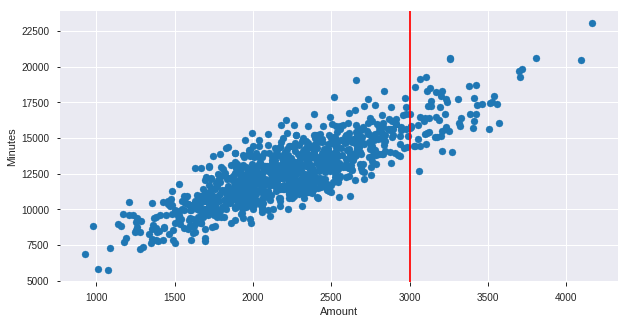

In [413]:
x = impt_cust['Amt'].values
y = impt_cust['Minutes'].values

plt.figure(figsize=(10, 5))
plt.scatter(x, y)
plt.axvline(x=3000, color='red') #I'll say 3000 is a pretty neat cutline, but that will depend on the companies plan
plt.xlabel('Amount')
plt.ylabel('Minutes')

#### Q2 - Who are our customers? Profile them elaborately

In [415]:
'''As we can see in the above graph, majority of customer use around 2500rs and 15000, minutes. I'm not sure if that answered question. I'll need more context for 
what is meant by "profile them"'''

'As we can see in the above graph, majority of customer use around 2500rs and 15000, minutes. I\'m not sure if that answered question. I\'ll need more context for \nwhat is meant by "profile them"'

### Q3 The startup has 4 offers running on a daily basis (valid for a day) Recharge - 20 for 10 Mins Recharge - 30 for 40 Mins Recharge - 40 for 80 Mins Recharge - 50 for 100 Mins

Their second recharge pack doesn't seem to perform as required, the others fetching ~100 recharges per day in a week on what day would it be advisable for the company to sell these recharges and boost calls made by users

In [417]:
#It's impossible to conjecture day wise information, given the fact that no day-wise sold-details is provided. 

### Q4 - An investor wishes to see week,month and yearly metrics, derive maxmimum insights from the data

In [16]:
q1.head()

CustID  Week  Calls  Minutes    Amt
0 1,001.00  1.00  56.00   392.00  78.40
1 1,001.00  2.00  49.00   735.00 154.35
2 1,001.00  3.00 140.00   420.00 126.00
3 1,001.00  4.00 182.00 1,638.00 393.12
4 1,001.00  5.00  70.00 1,050.00 294.00

##### Yearly

In [17]:
''' It is difficult to generate yearly metrics, given only 24 weeks of data, still below are weekly, monthly and yearly metrics'''
q1.groupby(['Week'])['Amt', 'Minutes'].sum()

Amt    Minutes
Week                       
1.00   10,621.10  61,796.00
2.00   36,206.94 196,546.00
3.00   63,339.92 360,318.00
4.00   98,058.80 555,884.00
5.00   96,137.86 549,199.00
6.00   98,659.61 558,964.00
7.00  101,236.45 582,463.00
8.00   96,850.74 551,096.00
9.00   97,614.30 565,670.00
10.00  98,613.76 554,078.00
11.00 108,176.67 612,528.00
12.00  94,512.81 547,666.00
13.00 109,863.95 615,608.00
14.00  97,121.85 535,738.00
15.00 108,372.95 617,218.00
16.00  90,633.20 501,578.00
17.00 103,495.84 598,171.00
18.00  96,055.68 562,478.00
19.00  97,718.60 550,858.00
20.00 110,482.33 615,447.00
21.00 107,233.28 610,694.00
22.00 100,379.86 577,766.00
23.00 111,502.86 632,576.00
24.00  98,255.99 568,204.00

In [19]:
#Month would be roughly 4 weeks of data

data = q1.groupby(['Week'])['Amt', 'Minutes'].sum().reset_index().values

In [20]:
amt=[]
wk = []
curr_sum = 0
curr_wk = 0
for i in range(24):
    curr_sum += data[i][1]
    curr_wk += data[i][2]
    if data[i][0]%4 == 0:
        
        amt.append(curr_sum) #Appending sum of amount and week, every fourth week. Sum of all the amount in that week
        wk.append(curr_wk)
        curr_sum = 0
        curr_wk = 0
        
#Amt is is net amount spent in a month, wk is the net minutes spent in a month

In [21]:
pd.DataFrame(amt).describe()

0
count       6.00
mean  371,857.56
std    80,591.05
min   208,226.76
25%   394,392.88
50%   402,454.75
75%   407,312.33
max   417,371.99

In [22]:
pd.DataFrame(wk).describe()

0
count         6.00
mean  2,113,757.33
std     463,014.83
min   1,174,544.00
25%   2,248,827.00
50%   2,275,042.00
75%   2,315,201.00
max   2,389,240.00

In [418]:
print(amt)
print(wk)

[208226.76, 392884.66000000003, 398917.54000000027, 405991.9500000002, 407752.45000000007, 417371.98999999993]
[1174544.0, 2241722.0, 2279942.0, 2270142.0, 2326954.0, 2389240.0]


In [423]:
np.true_divide(np.array(amt), np.array(wk))#money spent per minute, is more or less constant

array([0.17728306, 0.17526021, 0.17496828, 0.17883989, 0.17523013,
       0.17468818])

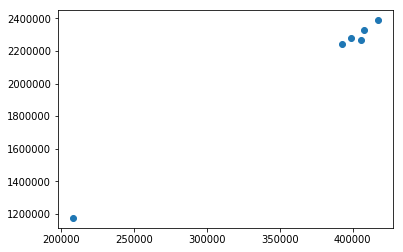

In [23]:
plt.scatter(amt, wk)

##### For some reason, initial week was very less active, in comparison to other weeks. Quite possibly, in later months possibly more and more people joined and so we can see the trend keeps increasing into future. 

##### Weekly

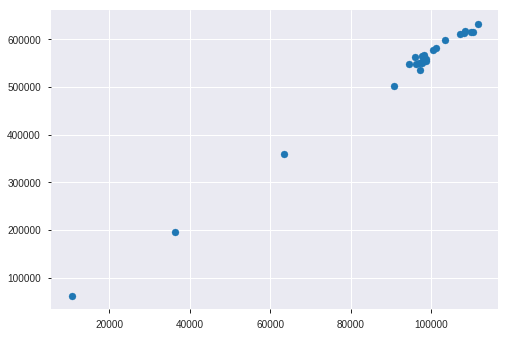

In [427]:
plt.scatter(q1.groupby(['Week'])['Amt', 'Minutes'].sum()['Amt'].values, q1.groupby(['Week'])['Amt', 'Minutes'].sum()['Minutes'].values)

##### We already have statistical information about week in above charts, but we can see that again, as we deduced in yearly analysis. As time goes by more and more people join the service and consumption of the services increase

### Brand Preference - Q2
Dataset -> `Brand_Preference.csv`

Q1. Brands (BP -> Brand Perference)

    A -> Elecktra (BP -> 3,5)
    B -> Velzoy (BP -> 1,2)
    C -> DemiCube (BP -> 3,2)
    D -> Harpy (BP -> 3,4)
    E -> 18Again (BP -> 4,5)

Which brand would be the best to on-board considering our target market is already established
with ages below 25 & above 45

Q2. A fellow co-worker would like to plot respondents brand preference based on three categorical levels, where the levels exist as columns, provide the dataset to them in a file format

Q3. What would be the most preffered brand based solely on brand preference

Q4. Regular Expressions

"""`Branding
One of the most critical and basic long-term objectives of marketing is to brand your company or product. This is the use of promotional techniques to create a particular reputation that resonates with target customers. Lexus has developed itself as a luxury and status car brand for people with upper-middle to upper class incomes. Target is a value-oriented retailer of fashion, apparel and home goods. Wal-Mart has built its brand on low prices. Regardless of the image, consumers prefer to purchase products and services that offer a clear value proposition as opposed to ones with uncertainty or mixed messages.`

`Research
Market research is key to increasing brand preferences, as the more you understand about what motivates your customers the easier it is to appeal to them. Getting to know the core beliefs that your products carry into the marketplace is especially useful. For instance, customers who buy high-end fashions generally expect to get a high level of service and to pay a premium price. Understanding this helps you to better tailor your offering to present good benefits and earn reasonable profit.`

`Emphasize Benefits
Turning a habitual or routine buyer into an emotionally attached, loyal customer with a strong brand preference is largely based on the customer's sense of value. Understanding your target market's preferred product or service features and benefits helps you optimize your offering and promote a product concept that meshes with the market's interest. As a premium coffee shop, for instance, your customers may prefer benefits such as taste quality, premium coffee beans, and fast customer service.`

`Engagement
"Engagement" has become a hot buzz word in early 21st century brand development. This is the use of more direct, interactive forms of communication with customers. Personal selling, email and and telemarketing are common, traditional forms of interpersonal communication. Social media, such as Twitter and Facebook, have significantly broadened the concept and importance of brand engagement. Customers move quickly and exchange experiences with others in these real-time social venues. Having a presence in the social media realm helps you directly engage customers and address negative discussions that could impact your brand's word-of-mouth.`"""
 
     1 - Remove all special characters
     
     2 - Find all words with "ing"
     
     3 - Which paragraph has the most vowels
     
     4 - Find the largest word & most repeated word
     
     5 - Find all hyphenated words

**Output for 2,5 must been in a list/array format 

In [24]:
band = pd.read_csv('Datasets/Brand Preference.csv')

In [25]:
band.columns

Index(['respondentid', 'age', 'preflevel'], dtype='object')

In [27]:
band.head()

respondentid  age  preflevel
0             1  <25          3
1             2  <25          2
2             3  <25          4
3             4  <25          3
4             5  <25          2

In [57]:
# Which brand would be the best to on-board considering our target market is already established with ages below 25 & above 45

# band.groupby(['age', 'preflevel']).agg({'preflevel': {'Count': 'count','SizeSum': 'sum'}})
into = band.groupby(['age', 'preflevel']).agg({'preflevel': {'Count': 'count'}}).reset_index()

In [58]:
into

age preflevel      
                    Count
0   25-40         3    10
1   25-40         4    21
2   25-40         5     6
3   40-55         1     1
4   40-55         2    14
5   40-55         3    14
6   40-55         4     2
7   40-55         5     2
8     <25         1     4
9     <25         2    11
10    <25         3    14
11    <25         4     7
12    <25         5     1

In [76]:
fourty_five = into[into['age']=='40-55']['preflevel'].values
twenty_five = into[into['age']=='<25']['preflevel'].values

In [77]:
sorted(fourty_five, key = lambda x: x[1])[::-1][0][0] #Sorting fourty_five in order of counts of preferences

3

In [78]:
sorted(twenty_five, key = lambda x: x[1])[::-1][0][0] #Sorting twenty_five in order of counts of preferences

3

In [412]:
sorted(fourty_five, key = lambda x: x[1])[::-1][1][0] #Sorting fourty_five in order of counts of preferences

2

In [411]:
sorted(twenty_five, key = lambda x: x[1])[::-1][1][0] #Sorting twenty_five in order of counts of preferences

2

#### So it's demicube

#### What would be the most preffered brand based solely on brand preference

In [88]:
band.groupby(['preflevel'])['respondentid'].count()

preflevel
1     5
2    25
3    38
4    30
5     9
Name: respondentid, dtype: int64

##### As we can see clearly, 3 is the most preferrable brand

Q 2.4
     
     1 - Remove all special characters
     
     2 - Find all words with "ing"
     
     3 - Which paragraph has the most vowels
     
     4 - Find the largest word & most repeated word
     
     5 - Find all hyphenated words##### 

In [94]:
import string

In [99]:
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [225]:
passage = "Branding One of the most critical and basic long-term objectives of marketing is to brand your company or product.\
 This is the use of promotional techniques to create a particular reputation that resonates with target customers. \
Lexus has developed itself as a luxury and status car brand for people with upper-middle to upper class incomes. \
Target is a value-oriented retailer of fashion, apparel and home goods. Wal-Mart has built its brand on low prices.\
Regardless of the image, consumers prefer to purchase products and services that offer a clear value proposition as\
opposed to ones with uncertainty or mixed messages.`\
\
\
`Research\
 Market research is key to increasing brand preferences, as the more you understand about what motivates your customers \
the easier it is to appeal to them. Getting to know the core beliefs that your products carry into the marketplace is \
especially useful. For instance, customers who buy high-end fashions generally expect to get a high level of service and\
to pay a premium price. Understanding this helps you to better tailor your offering to present good benefits and earn reasonable profit.`\
\
\
`Emphasize Benefits.\
 Turning a habitual or routine buyer into an emotionally attached, loyal customer with a strong brand preference is largely \
based on the customer's sense of value. Understanding your target market's preferred product or service features and benefits \
helps you optimize your offering and promote a product concept that meshes with the market's interest. As a premium coffee shop,\
for instance, your customers may prefer benefits such as taste quality, premium coffee beans, and fast customer service.`\
\
\
`Engagement\
'Engagement' has become a hot buzz word in early 21st century brand development. This is the use of more direct, interactive \
forms of communication with customers. Personal selling, email and and telemarketing are common, traditional forms of interpersonal \
communication. Social media, such as Twitter and Facebook, have significantly broadened the concept and importance of brand engagement.\
Customers move quickly and exchange experiences with others in these real-time social venues. Having a presence in the social media realm \
helps you directly engage customers and address negative discussions that could impact your brand's word-of-mouth."

In [226]:
removed = re.sub("[!#$%&\'()*+-/:;<=>?@[\\]^_`{|}~']", " ", passage) #Removing all special characters
removed

'Branding One of the most critical and basic long term objectives of marketing is to brand your company or product  This is the use of promotional techniques to create a particular reputation that resonates with target customers  Lexus has developed itself as a luxury and status car brand for people with upper middle to upper class incomes  Target is a value oriented retailer of fashion  apparel and home goods  Wal Mart has built its brand on low prices Regardless of the image  consumers prefer to purchase products and services that offer a clear value proposition asopposed to ones with uncertainty or mixed messages   Research Market research is key to increasing brand preferences  as the more you understand about what motivates your customers the easier it is to appeal to them  Getting to know the core beliefs that your products carry into the marketplace is especially useful  For instance  customers who buy high end fashions generally expect to get a high level of service andto pay a

In [227]:
space = removed.split(' ')

In [228]:
for i in space:

    pattern = 'ing'
    if re.search(pattern, i) is not None:
        print(i)

Branding
marketing
increasing
Getting
Understanding
offering
Turning
Understanding
offering
selling
telemarketing
Having


In [229]:
p1 = "Branding One of the most critical and basic long-term objectives of marketing is to brand your company or product.\
This is the use of promotional techniques to create a particular reputation that resonates with target customers. \
Lexus has developed itself as a luxury and status car brand for people with upper-middle to upper class incomes. \
Target is a value-oriented retailer of fashion, apparel and home goods. Wal-Mart has built its brand on low prices.\
Regardless of the image, consumers prefer to purchase products and services that offer a clear value proposition as\
opposed to ones with uncertainty or mixed messages."

p2 = "Research\
Market research is key to increasing brand preferences, as the more you understand about what motivates your customers \
the easier it is to appeal to them. Getting to know the core beliefs that your products carry into the marketplace is \
especially useful. For instance, customers who buy high-end fashions generally expect to get a high level of service and\
to pay a premium price. Understanding this helps you to better tailor your offering to present good benefits and earn reasonable profit."

p3 = "Emphasize Benefits\
Turning a habitual or routine buyer into an emotionally attached, loyal customer with a strong brand preference is largely \
based on the customer's sense of value. Understanding your target market's preferred product or service features and benefits \
helps you optimize your offering and promote a product concept that meshes with the market's interest. As a premium coffee shop,\
for instance, your customers may prefer benefits such as taste quality, premium coffee beans, and fast customer service."

p4 = "Engagement\
'Engagement' has become a hot buzz word in early 21st century brand development. This is the use of more direct, interactive \
forms of communication with customers. Personal selling, email and and telemarketing are common, traditional forms of interpersonal \
communication. Social media, such as Twitter and Facebook, have significantly broadened the concept and importance of brand engagement.\
Customers move quickly and exchange experiences with others in these real-time social venues. Having a presence in the social media realm \
helps you directly engage customers and address negative discussions that could impact your brand's word-of-mouth."

In [230]:
from collections import Counter

In [231]:
c1 = Counter(p1)
c2 = Counter(p2)
c3 = Counter(p3)
c4 = Counter(p4)

In [232]:
c1_sum = 0

for i in ['a', 'i', 'o', 'e', 'u']:
    c1_sum +=c1[i]
    
c2_sum = 0

for i in ['a', 'i', 'o', 'e', 'u']:
    c2_sum +=c2[i]
    
c3_sum = 0

for i in ['a', 'i', 'o', 'e', 'u']:
    c3_sum +=c3[i]
    
c4_sum = 0

for i in ['a', 'i', 'o', 'e', 'u']:
    c4_sum +=c4[i]
    


In [233]:
print(c1_sum, c2_sum, c3_sum, c4_sum)

199 160 163 209


#### p4 has higest vowels

In [234]:
largest = Counter(space)

In [235]:
largest.most_common() #Most common word is and

[('', 35),
 ('and', 14),
 ('of', 12),
 ('the', 12),
 ('to', 12),
 ('a', 12),
 ('is', 8),
 ('brand', 8),
 ('your', 8),
 ('with', 7),
 ('customers', 6),
 ('that', 5),
 ('s', 4),
 ('you', 4),
 ('as', 4),
 ('or', 4),
 ('premium', 3),
 ('in', 3),
 ('has', 3),
 ('service', 3),
 ('helps', 3),
 ('product', 3),
 ('benefits', 3),
 ('value', 3),
 ('customer', 3),
 ('media', 2),
 ('such', 2),
 ('on', 2),
 ('upper', 2),
 ('more', 2),
 ('target', 2),
 ('concept', 2),
 ('forms', 2),
 ('for', 2),
 ('high', 2),
 ('use', 2),
 ('This', 2),
 ('social', 2),
 ('coffee', 2),
 ('instance', 2),
 ('Understanding', 2),
 ('offering', 2),
 ('Engagement', 2),
 ('into', 2),
 ('products', 2),
 ('word', 2),
 ('prefer', 2),
 ('communication', 2),
 ('market', 2),
 ('importance', 1),
 ('attached', 1),
 ('buzz', 1),
 ('habitual', 1),
 ('profit', 1),
 ('basic', 1),
 ('selling', 1),
 ('meshes', 1),
 ('end', 1),
 ('retailer', 1),
 ('mouth', 1),
 ('Customers', 1),
 ('ones', 1),
 ('marketing', 1),
 ('developed', 1),
 ('real', 

In [236]:
maxx = -100
word = ''
for i in space:
    if len(i) > maxx:
        word = i
        maxx = len(i)

In [237]:
word #Understanding is the biggest word

'Understanding'

In [245]:
for i in passage.split(' '):
    if '-' in i:
        print(i) #All the hyphenated words

long-term
upper-middle
value-oriented
Wal-Mart
high-end
real-time
word-of-mouth.


### Weekend Campaign  - Q3
Dataset -> `Weekend_Campaign.xlsx`

The campaign was tested in 24 stores on week end before launching in all stores.
The growth figures(%) are tabulated in the data set.

1.	Is overall growth during campaign month significantly more than 20%? 

2.	Which factors have significant impact on growth? Perform detailed analysis.               

3.  Which regions over a period of time have maximum growth?                     

4.	Present the data graphically


### Is overall growth during campaign month significantly more than 20%?

In [326]:
weekend = pd.read_excel('Datasets/Weekend Campaign.xlsx', column = ['NORTH', 'WEST', 'SOUTH', 'EAST'])

In [339]:
weekend.rename(columns=lambda x: x.strip(), inplace=True)

In [371]:
shortened = weekend.groupby('Years')['NORTH', 'WEST', 'SOUTH', 'EAST'].mean()

In [372]:
shortened

NORTH  WEST  SOUTH  EAST
Years                          
0-1    21.90 20.80  23.80 19.55
1-3    18.75 18.60  18.55 16.85
3-5    16.90 15.95  16.20 17.70

In [404]:
shortened.iloc[0].values.mean() #this is the mean of campaign month

21.5125

##### Now we are gonna perform hypothesis testing, to decide if the above mean is sin

In [378]:
from scipy.stats import ttest_1samp

###### Null hypothesis: They're not different; Alt. hypothesis, they're different

In [381]:
ttest_1samp(shortened.iloc[0].values, 20)
# p-value isn't less than 0.05, so we can't reject null hypothesis. 

Ttest_1sampResult(statistic=1.6786676842281725, pvalue=0.19180931946386995)

### Which factors have significant impact on growth? Perform detailed analysis.

We can see from the attached factor.html file,  WEST is highly correlated with SOUTH (ρ = 0.9636752494), SOUTH is highly correlated with NORTH (ρ = 0.9976995899)
Further, Years also seem to have big impact on growth, after couple of years, growth percentage starts reaching a plateau. Which quite makes sense, as the later percentage are 
parts of much bigger organizations or companies. Initial percentage were part of smaller company. With such small features, it's difficult to conjecture more. 


### Which regions over a period of time have maximum growth?

In [405]:
def calc_growth(array):
    curr = 100
    for i in range(len(array)):
        curr = array[i] * curr + curr
    return curr

In [407]:
north_growth = calc_growth(shortened['NORTH'].values)
south_growth = calc_growth(shortened['SOUTH'].values)
east_growth = calc_growth(shortened['EAST'].values)
west_growth = calc_growth(shortened['WEST'].values)

In [408]:
print("This is north_growth", north_growth)
print("This is south_growth", south_growth)
print("This is west_growth", west_growth)
print("This is east_growth", east_growth)

This is north_growth 809572.2499999999
This is south_growth 833924.7999999999
This is west_growth 724239.5999999999
This is east_growth 685948.7250000001


##### As we can see here, South had maximum growth over time

### Present the data graphically

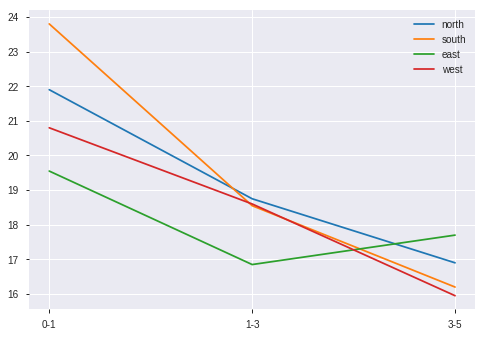

In [396]:
plt.plot(shortened['NORTH'], label='north')
plt.plot(shortened['SOUTH'], label='south')
plt.plot(shortened['EAST'], label='east')
plt.plot(shortened['WEST'], label='west')
plt.legend()

## Questions S2
1. The mean of 10 numbers is 80. One number was wrongly recorded as 2 instead of 12. Find the correct mean.


2. The Pearson’s correlation coefficients (Pearson’s) between X and Y is 1.5.

    a) X and Y are highly correlated 

    b) No correlation between X and Y

    c) Possible calculation error.

                                                                   
3.	Which of the following is a measure of variation?

    a) Median 

    b) Standard Deviation 

    c) Third quartile                     


4.	Explain the difference between “Parametric Test’ and ‘Non Parametric Test’


5. Factor loading Lij is same as variance of Xi (True or False)


6. K means clustering is one of the hierarchical clustering method. (True or False)


7. What may be the effect of ignoring autocorrelation in error terms in linear regression using time series data?


8. Distinguish between time series data and panel data using suitable example.


9. The principal component analysis is performed using correlation matrix of 8 variables. What is the proportion of variance explained by the principal components? what components are to be chosen to plot graphically in 3D?


PC1 - > 3.07

PC2 - > 1.91

PC3 - > 2.40

PC4 - > 4.11

PC5 - > 0.68

PC6 - > 3.24

PC7 - > 1.35

PC8 - > 0.11
